### Read spreadsheet

In [3]:
import pandas as pd
import random
import json
import csv

In [4]:
xls = pd.ExcelFile('Radcliffe Poetry Facebook Posts (Paige).xlsx')
dfPosts = pd.read_excel(xls, 'Posts')
dfAuthors = pd.read_excel(xls, 'Authors')
dfCoords = pd.read_excel(xls, 'Location')

In [8]:
dfPosts.head()

,Timestamp,Author of poem,Missing from Authors tab?,Author of post,Date posted,URL of facebook post,Private post or link not working?,Themes curated,Theme(s) (comma separated),Theme 2 (blank),...,Additional URL (if the post links to an external poem),fulltext,Comments (copy and paste),Number of likes,Number of comments,Number of shares,Other notes,Your name,Suggestion/correction in comment field?,Unnamed: 25
0,87,Halyna Kruk,NaN,Halyna Kruk,2013-12-06,https://www.facebook.com/halyna.kruk/posts/101...,NaN,"{'maidan', 'revolution', 'protest', 'ukraine'}",Maidan,Ukraine,...,NaN,"9+\n3\n20+\nEran\nHalyna Kruk\nDecember 6, 201...",NaN,251.0,27.0,68.0,Read by author at Lviv Euromaidan,NaN,NaN,NaN
1,2022-04-10 23:30:07,Ostap Slyvynsky,NaN,Ostap Slyvynsky,2013-12-26,https://www.facebook.com/ostap.slyvynsky/posts...,NaN,"{'maidan', 'poetic form', 'haiku', 'revolution...","Haiku, Maidan",NaN,...,NaN,ХАЙКУ З МАЙДАНУ\nДим у рукавах.\nНіби йдеш з ц...,Yulia Tareieva\nТак як є\nSee Translation8y\nS...,93.0,7.0,10.0,NaN,Amelia Glaser,NaN,NaN
2,53,Osip Mandelstam,NaN,Maria Stepanova,2013-12-27,https://www.facebook.com/maria.stepanova.372,NaN,"{'time', 'war', 'twentieth century'}",war,twentieth century,...,NaN,9+\n3\n20+\nEran\nMaria Stepanova\n3 mutual\nA...,NaN,50.0,4.0,3.0,By Osip Mandelshtam (1935-36),NaN,NaN,NaN
3,2022-08-02 13:10:06.549000,Boris Khersonsky,NaN,Boris Khersonsky,2013-12-31,https://www.facebook.com/borkhers/posts/pfbid0...,NaN,NaN,"Soviet Union, food, morphine, anthem",NaN,...,NaN,NaN,Леонид Кучеренко\nЯ сразу вспомнил ТУ жизнь\n\...,120.0,19.0,11.0,NaN,Amelia Glaser,No,NaN
4,2022-04-29 11:28:58.828000,Oleksandr Irvanets,NaN,Oleksandr Irvanets,2014-01-01,https://www.facebook.com/alekirvan/posts/10202...,NaN,"{'seasons', 'time', 'new year'}",New year,NaN,...,NaN,NaN,"Lusienna Maselska\nПРЯМИЙ, ЯК КОЧЕРГА - БЛЄСК!...",111.0,7.0,4.0,NaN,Olga Kiyan,NaN,NaN


### Who are the Russian-language authors?

In [17]:
dfPosts.columns

Index(['Timestamp', 'Author of poem', 'Missing from Authors tab?',
       'Author of post', 'Date posted', 'URL of facebook post',
       'Private post or link not working?', 'Themes curated',
       'Theme(s) (comma separated)', 'Theme 2 (blank)', 'Theme 3 (blank)',
       'Poem(s) in comment field?', 'Language', 'In translation?',
       'Original language (if post is a translation)',
       'Poem full text (copy and paste)',
       'Additional URL (if the post links to an external poem)', 'fulltext',
       'Comments (copy and paste)', 'Number of likes', 'Number of comments',
       'Number of shares', 'Other notes', 'Your name',
       'Suggestion/correction in comment field? ', 'Unnamed: 25'],
      dtype='object')

In [10]:
dfPosts['Language'].value_counts()

Ukrainian                                                                                      589
Russian                                                                                        337
English                                                                                         24
Polish                                                                                          21
Hebrew                                                                                           9
Belorusian                                                                                       5
Russian, Ukrainian                                                                               3
Italian                                                                                          2
Estonian                                                                                         2
Croatian                                                                                         2
Georgian  

### Create new df

In [11]:
posts = dfPosts[dfPosts['Language'] == 'Russian']

In [12]:
posts['Author of post'].value_counts()

Boris Khersonsky         113
Dmitry Strotsev           35
Maria Galina              27
Nathalie Beltchenko       24
Ludmila Khersonskaya      18
Strotsev Dmitry           15
Andrij Bondar             14
Arkadii Shtypel           13
Stanislav Belskiy         11
Dmitry Kuzmin             10
Iya Kiva                   8
Vladislava Ilinska         7
Maria Stepanova            6
Julia Musakovska           5
Liudmila Khersonskaya      4
Oleksandr Irvanets         3
Alex Averbuch              3
Ilya Rissenberg            3
Olga Bragina               3
Elena Borishpolets         2
Marianna Kijanowska        2
Kateryna Kalytko           2
Iryna Tsilyk               1
Maria Galina               1
Ostap Slyvynsky            1
Gleb Morev                 1
Halyna Kruk                1
Lilia Burzhurova           1
Nina Kossman               1
Igor Karaulov              1
Boris Khersonsky           1
Name: Author of post, dtype: int64

In [13]:
df = posts[posts['Author of post'] == 'Boris Khersonsky']

<AxesSubplot:xlabel='Date posted,Date posted'>

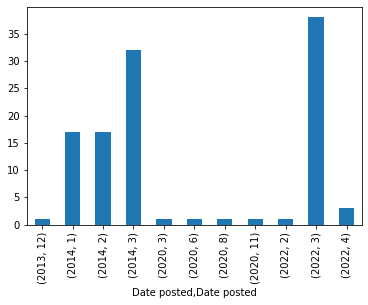

In [16]:
df['Date posted'].groupby([df["Date posted"].dt.year, df["Date posted"].dt.month]).count().plot(kind="bar")